각:90 n/ 10진값:1.5707963267948966
이미지의 크기 1231 694
to이미지의 크기 694 1231


C:\Users\KimSH\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\KimSH\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\KimSH\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\KimSH\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\KimSH\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\KimSH\anaconda3\lib

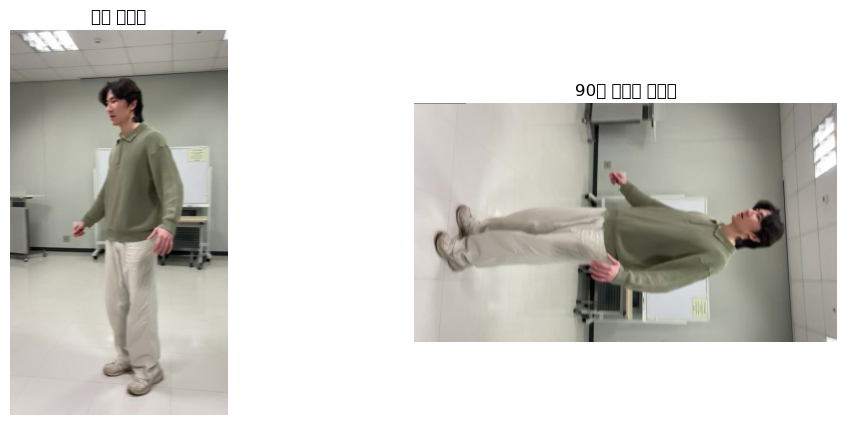

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rotate_image(image, angle_degrees):
    """
    이 함수는 주어진 각도로 이미지를 회전합니다. scipy.ndimage.rotate를 사용하지 않습니다.
    각 픽셀에 회전 행렬을 적용하기 위해 numpy를 사용합니다.
    """
    # 각도를 라디안으로 변환합니다.
    angle_radians = np.deg2rad(angle_degrees)
    print(f'각:{angle_degrees} n/ 10진값:{angle_radians}')
    # 2D 회전 행렬을 생성합니다.
    rotation_matrix = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians)],
        [np.sin(angle_radians), np.cos(angle_radians)]
    ])

    # 이미지의 크기를 찾습니다.
    height, width = image.shape[:2]
    print('이미지의 크기',height,width)
    # 새 이미지 차원을 계산합니다.
    new_height = int(abs(height*np.cos(angle_radians)) + abs(width*np.sin(angle_radians)))
    new_width = int(abs(width*np.cos(angle_radians)) + abs(height*np.sin(angle_radians)))
    print('to이미지의 크기',new_height,new_width)
    
    # 원본과 동일한 채널 수를 가진 새로운 차원의 빈 이미지를 생성합니다.
    rotated_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)

    # 회전 중심을 찾습니다.
    centre_y, centre_x = height // 2, width // 2

    # 새 이미지를 반복합니다.
    for y in range(new_height):
        for x in range(new_width):
            # 좌표를 새 이미지의 중심으로 변환합니다.
            y_c = y - new_height // 2
            x_c = x - new_width // 2

            # 회전 행렬을 적용합니다.
            original_y_c, original_x_c = rotation_matrix @ np.array([y_c, x_c])

            # 중심에서 왼쪽 상단 모서리로 다시 변환합니다.
            original_y = original_y_c + centre_y
            original_x = original_x_c + centre_x

            # 좌표가 원본 이미지의 범위 내에 있는 경우 픽셀을 복사합니다.
            if 0 <= original_x < width and 0 <= original_y < height:
                rotated_image[y, x] = image[int(original_y), int(original_x)]

    return rotated_image

# 이미지 로드
image_path = '0001.jpg' # 예시 이미지 경로
image = mpimg.imread(image_path)

# 회전 각도 설정
theta = 90 # 90도 회전

# 이미지 회전
rotated_image = rotate_image(image, theta)

# 원본 이미지와 회전된 이미지를 나란히 표시
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 원본 이미지 표시
ax[0].imshow(image)
ax[0].set_title('원본 이미지')
ax[0].axis('off')

# 회전된 이미지 표시
ax[1].imshow(rotated_image)
ax[1].set_title('{}도 회전된 이미지'.format(theta))
ax[1].axis('off')

# 그래프 표시
plt.show()

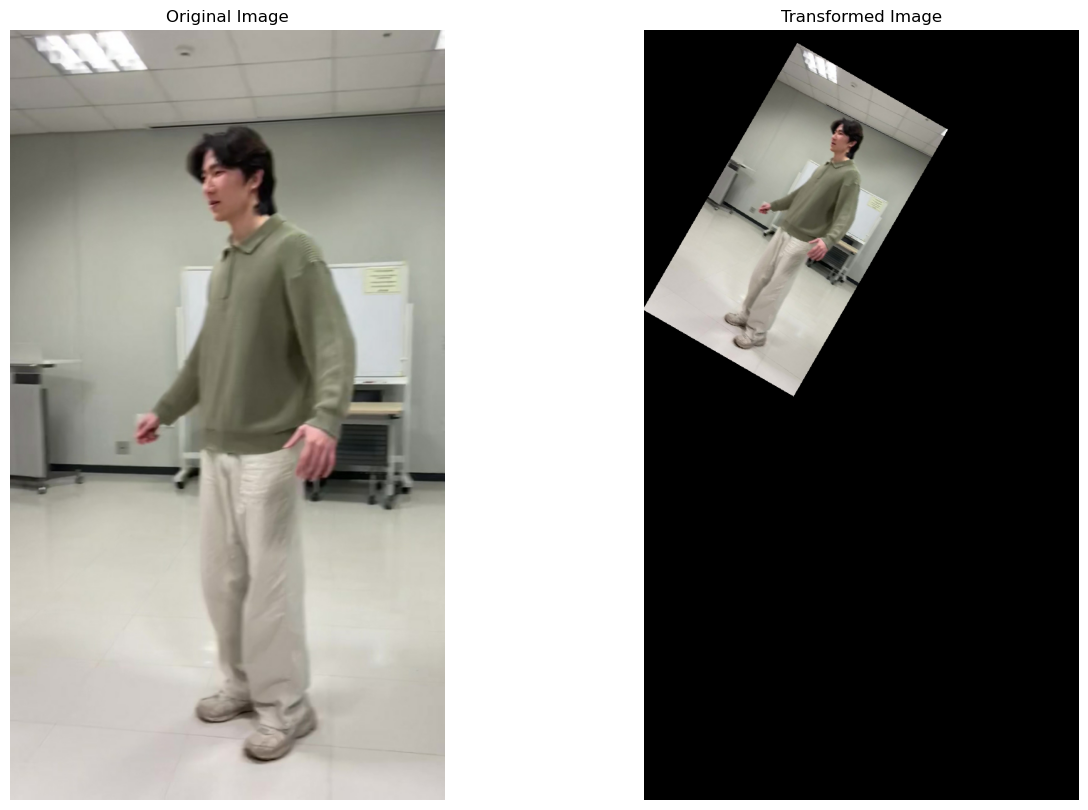

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def similarity_transform(image, angle_degrees, scale, translation):
    """
    지정된 각도, 축척 및 변환(tx, ty)이 있는 이미지에 유사도 변환을 적용합니다.
    """
    angle_radians = np.deg2rad(angle_degrees)
    transform_mat = np.array([
        [scale * np.cos(angle_radians), -scale * np.sin(angle_radians), translation[0]],
        [scale * np.sin(angle_radians), scale * np.cos(angle_radians), translation[1]],
        [0, 0, 1]
    ])
    transform_mat_inv = np.linalg.inv(transform_mat)

    transformed_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            source_pos = np.dot(transform_mat_inv, np.array([x, y, 1]))
            source_x, source_y = source_pos[0], source_pos[1]

            # If the source position is within the bounds of the source image, use its value
            if 0 <= source_x < image.shape[1] and 0 <= source_y < image.shape[0]:
                transformed_image[y, x] = image[int(source_y), int(source_x)]

    return transformed_image

# Load the image
image_path = '0001.jpg' # 예제 이미지 경로
image = mpimg.imread(image_path)

# If the image has an alpha channel, remove it
if image.shape[2] == 4:
    image = image[:, :, :3]

# Apply similarity transformation
angle = 30  # degrees
scale = 0.4
translation = (244, 20)  # pixels
transformed_img = similarity_transform(image, angle, scale, translation)

# Display the original and transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_img)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.show()

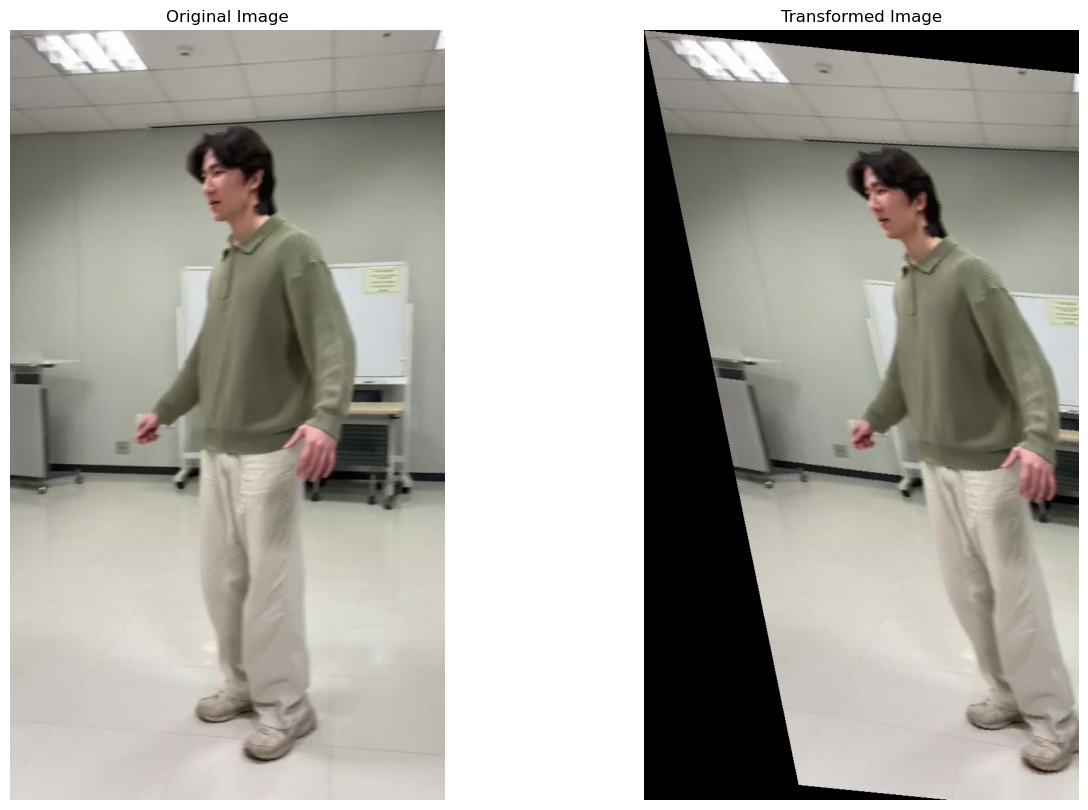

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def apply_affine_transform(image, transform_matrix):
    """
    Apply an affine transform to an image with the given transformation matrix.
    """
    # Compute the inverse transformation matrix, since we need to map the target pixels back to the source
    transform_mat_inv = np.linalg.inv(transform_matrix)

    # Apply the transformation
    transformed_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            source_pos = np.dot(transform_mat_inv, np.array([x, y, 1]))
            source_x, source_y = source_pos[0], source_pos[1]

            # If the source position is within the bounds of the source image, use its value
            if 0 <= source_x < image.shape[1] and 0 <= source_y < image.shape[0]:
                transformed_image[y, x] = image[int(source_y), int(source_x)]

    return transformed_image

# Load the image
image_path = '0001.jpg'
image = mpimg.imread(image_path)

# If the image has an alpha channel, remove it
if image.shape[2] == 4:
    image = image[:, :, :3]

# Define the affine transformation matrix
# For the sake of example, we use an identity matrix which does not change the image
affine_mat = np.array([
    [1, 0.2, 0],
    [0.1, 1, 0.1],
    [0, 0.2, 1]
])

# Apply affine transformation
transformed_img = apply_affine_transform(image, affine_mat)

# Display the original and transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_img)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image_path = '0001.jpg'  # Replace with your image path
image = mpimg.imread(image_path)

# Define the perspective transformation matrix
# This is an example matrix that needs to be adjusted for your use case
perspective_matrix = np.array([
    [1, 0, 100],
    [0, 1, 50],
    [0.001, 0.002, 1]
])

# Compute the inverse matrix
inv_perspective_matrix = np.linalg.inv(perspective_matrix)

# Prepare the transformed image canvas
height, width = image.shape[:2]
transformed_image = np.zeros_like(image)

# Apply the transformation
for x in range(width):
    for y in range(height):
        # Apply the perspective transformation
        new_pos = inv_perspective_matrix @ np.array([x, y, 1])
        new_pos /= new_pos[-1]  # Normalize the coordinates
        new_x, new_y = int(new_pos[0]), int(new_pos[1])
        
        # Check if the new coordinates are within the bounds of the original image
        if 0 <= new_x < width and 0 <= new_y < height:
            transformed_image[y, x] = image[new_y, new_x]

# Show the original and the transformed images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image)
plt.title('Transformed Image')
plt.axis('off')

plt.show()


C:\Users\KimSH\AppData\Local\Temp\ipykernel_14532\969182753.py:29: RuntimeWarning: divide by zero encountered in divide
  new_pos /= new_pos[-1]  # Normalize the coordinates
C:\Users\KimSH\AppData\Local\Temp\ipykernel_14532\969182753.py:29: RuntimeWarning: invalid value encountered in divide
  new_pos /= new_pos[-1]  # Normalize the coordinates


ValueError: cannot convert float NaN to integer